In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv('wine_fullclean.csv')

In [14]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,portugal,"this_is_ripe_and_fruity,_a_wine_that_is_smooth...",avidagos,87,15.0,douro,jerez,roger_voss,@vossroger,quinta_dos_avidagos_2011_avidagos_red_(douro),portuguese_red,quinta_dos_avidagos
1,us,"tart_and_snappy,_the_flavors_of_lime_flesh_and...",NaN,87,14.0,oregon,willamette_valley,paul_gregutt,@paulgwine,rainstorm_2013_pinot_gris_(willamette_valley),pinot_gris,rainstorm
2,us,"pineapple_rind,_lemon_pith_and_orange_blossom_...",reserve_late_harvest,87,13.0,michigan,lake_michigan_shore,alexander_peartree,NaN,st._julian_2013_reserve_late_harvest_riesling_...,riesling,st._julian
3,us,"much_like_the_regular_bottling_from_2012,_this...",vintner's_reserve_wild_child_block,87,65.0,oregon,willamette_valley,paul_gregutt,@paulgwine,sweet_cheeks_2012_vintner's_reserve_wild_child...,pinot_noir,sweet_cheeks
4,spain,blackberry_and_raspberry_aromas_show_a_typical...,ars_in_vitro,87,15.0,northern_spain,navarra,michael_schachner,@wineschach,tandem_2011_ars_in_vitro_tempranillo_merlot_(n...,tempranillo_merlot,tandem


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108016 entries, 0 to 108015
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                108016 non-null  object 
 1   description            108016 non-null  object 
 2   designation            76649 non-null   object 
 3   points                 108016 non-null  int64  
 4   price                  108016 non-null  float64
 5   province               108016 non-null  object 
 6   region_1               108016 non-null  object 
 7   taster_name            85353 non-null   object 
 8   taster_twitter_handle  80984 non-null   object 
 9   title                  108016 non-null  object 
 10  variety                108016 non-null  object 
 11  winery                 108016 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.9+ MB


In [16]:
df.isnull().sum()

country                      0
description                  0
designation              31367
points                       0
price                        0
province                     0
region_1                     0
taster_name              22663
taster_twitter_handle    27032
title                        0
variety                      0
winery                       0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=42)

len(df_full_train), len(df_train), len(df_val), len(df_test)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

In [18]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse= True)
features = ['points', 'country', 'province']

train_dicts = df_train[features].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[features].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

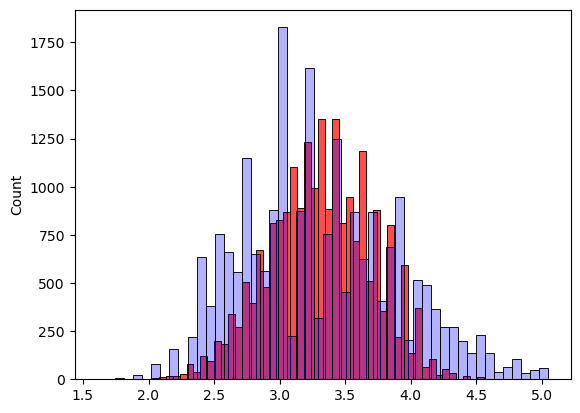

In [19]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

sns.histplot(y_pred, color= 'red', alpha= 0.7, bins= 50)
sns.histplot(y_val, color= 'blue', alpha= 0.3, bins= 50)

In [20]:
# Obter as previsões na escala de real
y_pred_orig = np.expm1(y_pred) 
# Obter o valor real (target):
y_val_orig= np.expm1(y_val)

from sklearn.metrics import mean_squared_error, mean_absolute_error
# Cálculo do MAE
mae = mean_absolute_error(y_val_orig, y_pred_orig)
print(f"MAE (Erro Absoluto Médio): ${mae:.2f}")

# Cálculo do RMSE
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
print(f"RMSE (Raiz do Erro Quadrático Médio): ${rmse:.2f}")

MAE (Erro Absoluto Médio): $11.52
RMSE (Raiz do Erro Quadrático Médio): $17.95


    Podemos perceber uma boa diferença nesse modelo.
    o fato desse dataset ser mais 'Limpo' que o anterior,
    prova um forte impacto no pré-processamento dos dados.
    Vamos agora explorar novas features para aprimorar-lo.

Vamos procurar novas Features para então melhorar meu modelo

In [21]:
df.info(), features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108016 entries, 0 to 108015
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                108016 non-null  object 
 1   description            108016 non-null  object 
 2   designation            76649 non-null   object 
 3   points                 108016 non-null  int64  
 4   price                  108016 non-null  float64
 5   province               108016 non-null  object 
 6   region_1               108016 non-null  object 
 7   taster_name            85353 non-null   object 
 8   taster_twitter_handle  80984 non-null   object 
 9   title                  108016 non-null  object 
 10  variety                108016 non-null  object 
 11  winery                 108016 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.9+ MB


(None, ['points', 'country', 'province'])

In [22]:
df.isnull().sum()

country                      0
description                  0
designation              31367
points                       0
price                        0
province                     0
region_1                     0
taster_name              22663
taster_twitter_handle    27032
title                        0
variety                      0
winery                       0
dtype: int64

In [23]:
df.variety.nunique(),df.variety.value_counts() 

(653,
 variety
 pinot_noir                  11336
 chardonnay                   9915
 cabernet_sauvignon           8314
 red_blend                    7573
 bordeaux_style_red_blend     4720
                             ...  
 vidadillo                       1
 bastardo                        1
 schwartzriesling                1
 albanello                       1
 bobal_cabernet_sauvignon        1
 Name: count, Length: 653, dtype: int64)

In [27]:
df.region_1.nunique(),df.region_1.value_counts() 

(1182,
 region_1
 mendoza                                     6170
 jerez                                       4483
 california                                  4331
 napa_valley                                 4037
 columbia_valley_(wa)                        3758
                                             ... 
 vin_de_pays_de_la_haute_vallée_du_gassac       1
 galluccio                                      1
 lamezia                                        1
 trentino_superiore                             1
 grands_echezeaux                               1
 Name: count, Length: 1182, dtype: int64)

In [24]:
df.winery.nunique(),df.winery.value_counts() 

(15552,
 winery
 wines_&_winemakers       199
 testarossa               195
 dfj_vinhos               194
 chateau_ste._michelle    169
 concha_y_toro            150
                         ... 
 pavilion_crossing          1
 joyful_noise               1
 simple_solace              1
 los_andes                  1
 penedo_borges              1
 Name: count, Length: 15552, dtype: int64)

In [25]:
df.title.nunique(),df.title.value_counts() 

(107079,
 title
 gloria_ferrer_nv_sonoma_brut_sparkling_(sonoma_county)                         9
 segura_viudas_nv_aria_estate_extra_dry_sparkling_(cava)                        7
 segura_viudas_nv_extra_dry_sparkling_(cava)                                    7
 bailly_lapierre_nv_brut__(crémant_de_bourgogne)                                6
 gloria_ferrer_nv_blanc_de_noirs_sparkling_(carneros)                           6
                                                                               ..
 carr_2005_syrah_(santa_ynez_valley)                                            1
 bortolomiol_2008_cartizze_dry__(prosecco_superiore_di_cartizze)                1
 bonterra_2006_syrah_(mendocino_county)                                         1
 boedecker_cellars_2006_shea_vineyard_pinot_noir_(willamette_valley)            1
 domaine_schoffit_2012_lieu_dit_harth_cuvée_caroline_gewurztraminer_(alsace)    1
 Name: count, Length: 107079, dtype: int64)

In [26]:
from sklearn.metrics import mutual_info_score
def mutual_info(x):
    return mutual_info_score(x, df_full_train.price)
categorical_var = [
    'country', 'province',
       'region_1', 'title', 'variety',
       'winery']
mi = df_full_train[categorical_var].apply(mutual_info).sort_values(ascending= False)
mi

title       3.916888
winery      2.243058
region_1    0.627563
variety     0.314155
province    0.281673
country     0.105968
dtype: float64

Vamos testar novas features = ['variety', 'region_1', 'winery'].
porem vamos fazer primeiro uma por uma assim analisamos a diferença nos pesos de cada

/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

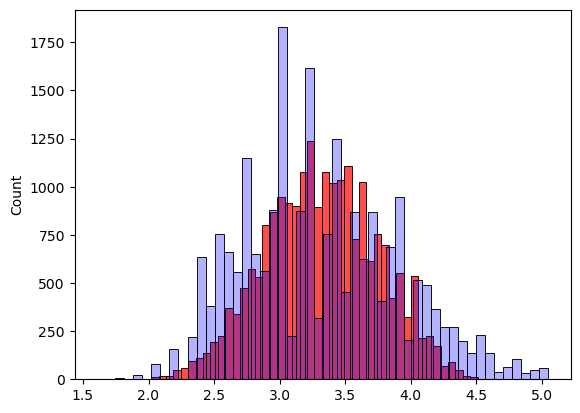

In [29]:
features1 = features + ['variety']
train_dicts = df_train[features1].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[features1].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

sns.histplot(y_pred, color= 'red', alpha= 0.7, bins= 50)
sns.histplot(y_val, color= 'blue', alpha= 0.3, bins= 50)

In [30]:
# Obter as previsões na escala de real
y_pred_orig = np.expm1(y_pred) 
# Obter o valor real (target):
y_val_orig= np.expm1(y_val)

# Cálculo do MAE
mae = mean_absolute_error(y_val_orig, y_pred_orig)
print(f"MAE (Erro Absoluto Médio): ${mae:.2f}")

# Cálculo do RMSE
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
print(f"RMSE (Raiz do Erro Quadrático Médio): ${rmse:.2f}")

MAE (Erro Absoluto Médio): $10.73
RMSE (Raiz do Erro Quadrático Médio): $16.90


Testando 'region_1' feature

/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

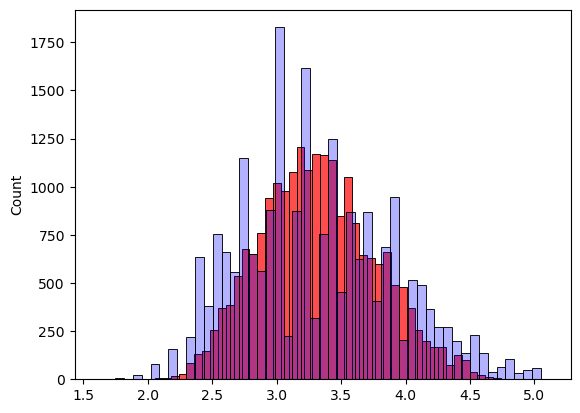

In [31]:
features1 = features + ['region_1']
train_dicts = df_train[features1].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[features1].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

sns.histplot(y_pred, color= 'red', alpha= 0.7, bins= 50)
sns.histplot(y_val, color= 'blue', alpha= 0.3, bins= 50)

In [32]:
# Obter as previsões na escala de real
y_pred_orig = np.expm1(y_pred) 
# Obter o valor real (target):
y_val_orig= np.expm1(y_val)

# Cálculo do MAE
mae = mean_absolute_error(y_val_orig, y_pred_orig)
print(f"MAE (Erro Absoluto Médio): ${mae:.2f}")

# Cálculo do RMSE
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
print(f"RMSE (Raiz do Erro Quadrático Médio): ${rmse:.2f}")

MAE (Erro Absoluto Médio): $10.08
RMSE (Raiz do Erro Quadrático Médio): $15.98


Testando 'winery' feature

/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

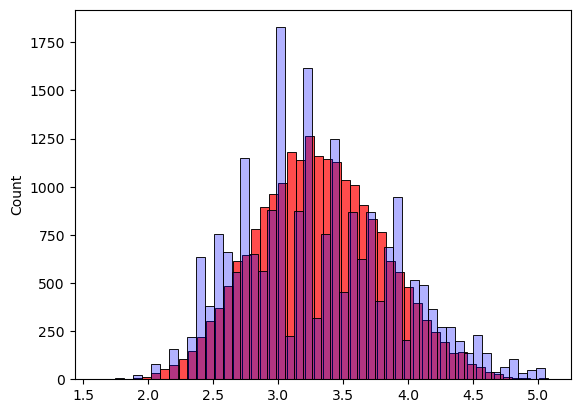

In [33]:
features1 = features + ['winery']
train_dicts = df_train[features1].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[features1].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

sns.histplot(y_pred, color= 'red', alpha= 0.7, bins= 50)
sns.histplot(y_val, color= 'blue', alpha= 0.3, bins= 50)

In [34]:
# Obter as previsões na escala de real
y_pred_orig = np.expm1(y_pred) 
# Obter o valor real (target):
y_val_orig= np.expm1(y_val)

# Cálculo do MAE
mae = mean_absolute_error(y_val_orig, y_pred_orig)
print(f"MAE (Erro Absoluto Médio): ${mae:.2f}")

# Cálculo do RMSE
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
print(f"RMSE (Raiz do Erro Quadrático Médio): ${rmse:.2f}")

MAE (Erro Absoluto Médio): $9.81
RMSE (Raiz do Erro Quadrático Médio): $15.87


Juntando todas as features

/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

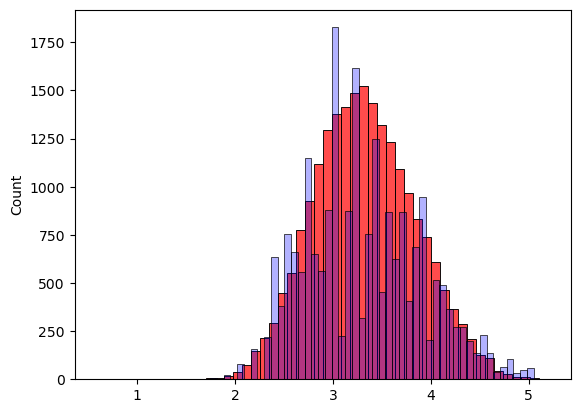

In [36]:
features1 = features + ['variety', 'region_1', 'winery']
train_dicts = df_train[features1].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[features1].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

sns.histplot(y_pred, color= 'red', alpha= 0.7, bins= 50)
sns.histplot(y_val, color= 'blue', alpha= 0.3, bins= 50)

In [37]:
# Obter as previsões na escala de real
y_pred_orig = np.expm1(y_pred) 
# Obter o valor real (target):
y_val_orig= np.expm1(y_val)

# Cálculo do MAE
mae = mean_absolute_error(y_val_orig, y_pred_orig)
print(f"MAE (Erro Absoluto Médio): ${mae:.2f}")

# Cálculo do RMSE
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
print(f"RMSE (Raiz do Erro Quadrático Médio): ${rmse:.2f}")

MAE (Erro Absoluto Médio): $8.47
RMSE (Raiz do Erro Quadrático Médio): $13.93


/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

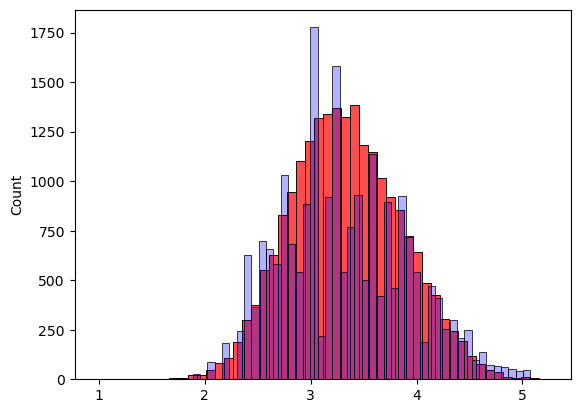

In [39]:
test_dicts = df_test[features1].to_dict(orient= 'records')
X_test = dv.transform(test_dicts)
y_pred_test = model.predict(X_test)

sns.histplot(y_pred_test, color= 'red', alpha= 0.7, bins= 50)
sns.histplot(y_test, color= 'blue', alpha= 0.3, bins= 50)

In [40]:
# Obter as previsões na escala de real
y_pred_orig = np.expm1(y_pred_test) 
# Obter o valor real (target):
y_test_orig= np.expm1(y_test)

# Cálculo do MAE
mae = mean_absolute_error(y_test_orig, y_pred_orig)
print(f"MAE (Erro Absoluto Médio): ${mae:.2f}")

# Cálculo do RMSE
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
print(f"RMSE (Raiz do Erro Quadrático Médio): ${rmse:.2f}")

MAE (Erro Absoluto Médio): $8.57
RMSE (Raiz do Erro Quadrático Médio): $13.99
